In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [2]:
dic = pickle.load( open( "../JET_OUT/jettrack_1D.p", "rb" ) )

In [4]:
dic['ACCESS1-0'].head()

,time,lat,ua,width,top,bottom,pr,years,months,seasons
0,1951-01-01 12:00:00,-47.1,21.907573,17.64,-35.94,-53.58,1.052290e-08,1951,1,1
1,1951-01-02 12:00:00,-47.28,20.23941,17.82,-35.76,-53.58,3.183215e-08,1951,1,1
2,1951-01-03 12:00:00,-47.46,18.377741,18.18,-35.58,-53.76,5.038497e-08,1951,1,1
3,1951-01-04 12:00:00,-47.46,16.641724,18.72,-35.22,-53.94,6.951927e-08,1951,1,1
4,1951-01-05 12:00:00,-47.28,15.329653,19.62,-34.86,-54.48,4.121385e-09,1951,1,1


In [3]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

Figure 5

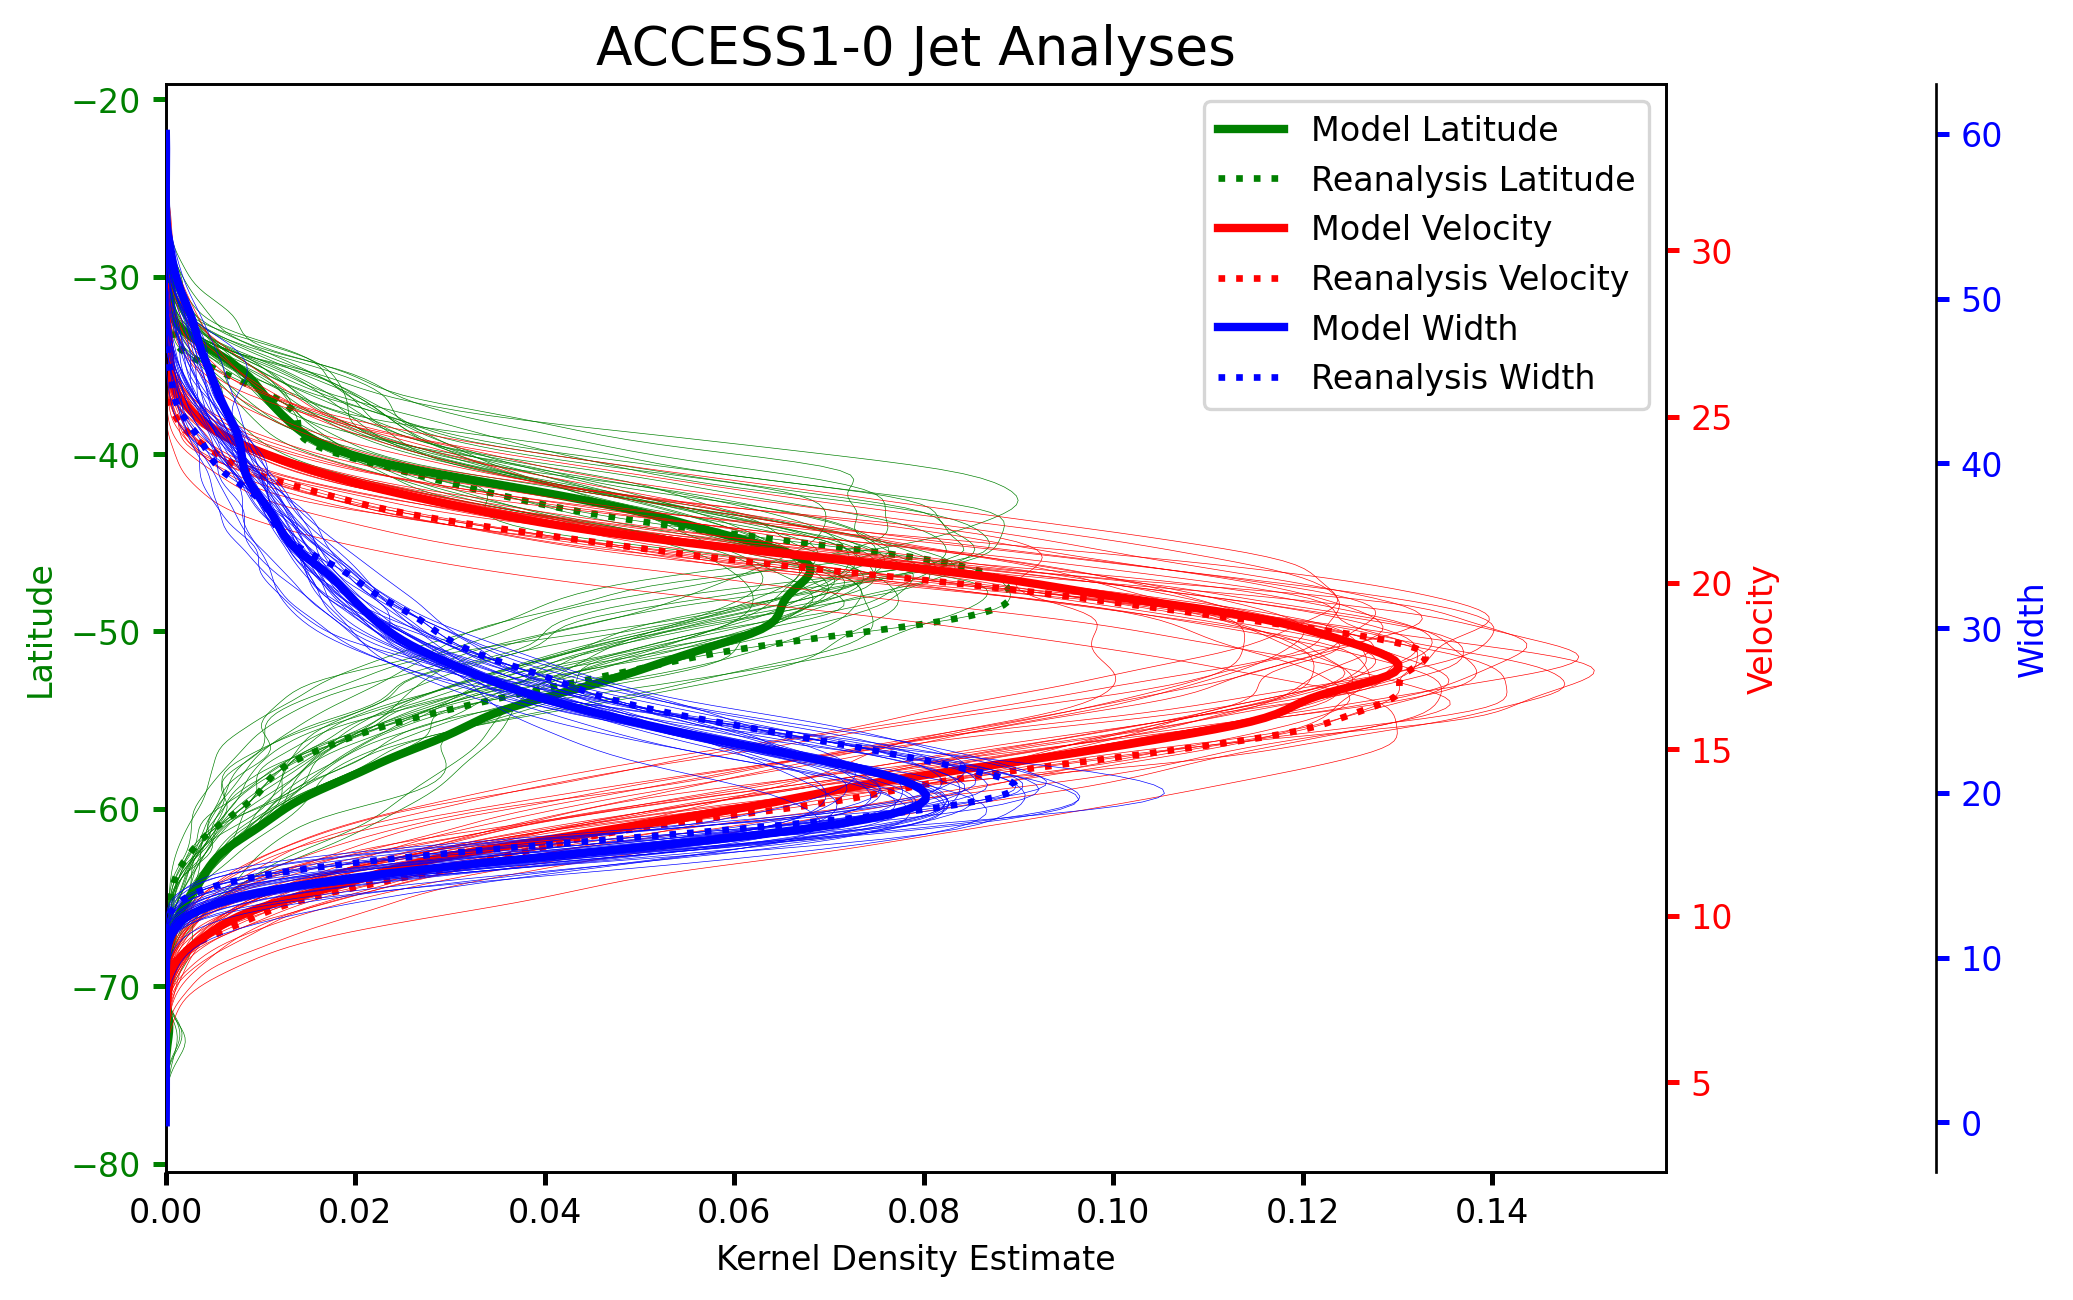

In [4]:
#for index in dic:
for index in ['ACCESS1-0']: 
    fig, ax1 = plt.subplots(figsize=(10,6), dpi = 240)
    fig.subplots_adjust(right=0.75)
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("axes", 1.18))
    make_patch_spines_invisible(ax3)
    ax3.spines["right"].set_visible(True)
    sns.kdeplot(y = list(dic[index].lat),lw=2.5,color='g', label='Model Latitude',ax=ax1, alpha = 0.4)
    for index2 in dic:
        sns.kdeplot(y = list(dic[index2].lat),lw=.2,color='g' ,ax=ax1, alpha = 0.1)
    sns.kdeplot(y = list(dic[index].ua),color='r',lw=2.5, label='Model Velocity',ax=ax2, alpha = 0.4)
    for index2 in dic:
        sns.kdeplot(y = list(dic[index2].ua),lw=.2,color='r' ,ax=ax2, alpha = 0.1)
    sns.kdeplot(y = list(dic[index].width),color='b',lw=2.5, label='Model Width',ax=ax3, alpha = 0.4, clip = (0,60))
    for index2 in dic:
        sns.kdeplot(y = list(dic[index2].width),lw=.2,color='b',ax=ax3, alpha = 0.1, clip = (0,60))
    sns.kdeplot(y = list(dic['NOAA'].lat),lw=2,color='g',linestyle = ':',label='Reanalysis Latitude', ax = ax1)
    sns.kdeplot(y = list(dic['NOAA'].ua),color='r',linestyle=':',label='Reanalysis Velocity', lw=2,ax=ax2)
    sns.kdeplot(y = list(dic['NOAA'].width),color='b',linestyle=':',lw=2, label = 'Reanalysis Width', ax=ax3, clip = (0,60))
    ax1.set_xlabel("Kernel Density Estimate")
    ax1.set_ylabel("Latitude")
    ax2.set_ylabel("Velocity")
    ax3.set_ylabel("Width")
    ax1.yaxis.label.set_color('g')
    ax2.yaxis.label.set_color('r')
    ax3.yaxis.label.set_color('b')
    tkw = dict(size=4, width=1.5)
    ax1.tick_params(axis='y', colors='g', **tkw)
    ax2.tick_params(axis='y', colors='r', **tkw)
    ax3.tick_params(axis='y', colors='b', **tkw)
    ax1.tick_params(axis='x', **tkw)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax3.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc=0)
    plt.title(str(index)+' Jet Analyses', fontsize=16, ha='center')
    plt.savefig('../JET_OUT/busyplot/pdf/busyplot_'+str(index)+'.pdf')
    plt.savefig('../JET_OUT/busyplot/png/busyplot_'+str(index)+'.png', format='png', dpi=1200)
    #plt.close()
    plt.show()
    

In [5]:
def is_winter(month):
    return (month == 6) | (month == 7) | (month == 8)

def is_summer(month):
    return (month == 12) | (month == 1) | (month == 2)

def is_autumn(month):
    return (month == 3) | (month == 4) | (month == 5)

def is_spring(month):
    return (month == 9) | (month == 10) | (month == 11)

In [6]:
label = {'lat':'latitude',
'width':'width',
'ua':'velocity',
'top':'Northern Extent',
'bottom':'Southern Extent'}

Figure 8 - seasonality

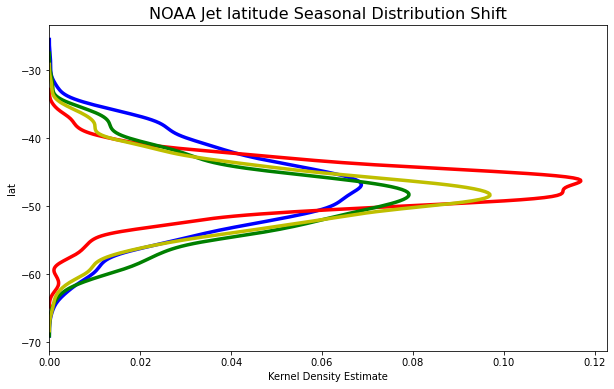

In [7]:
#for metric in ['lat','width','ua','top','bottom']:
for metric in ['lat']:
    winter = pd.to_numeric(dic['NOAA'].where(is_winter(dic['NOAA'].months)).dropna().set_index('years')[metric])
    summer = pd.to_numeric(dic['NOAA'].where(is_summer(dic['NOAA'].months)).dropna().set_index('years')[metric])
    spring = pd.to_numeric(dic['NOAA'].where(is_spring(dic['NOAA'].months)).dropna().set_index('years')[metric])
    autumn = pd.to_numeric(dic['NOAA'].where(is_autumn(dic['NOAA'].months)).dropna().set_index('years')[metric])
    fig, ax1 = plt.subplots(figsize=(10,6))
    sns.kdeplot(y = list(winter),lw=3.5,color='b',  label='Winter Width',ax=ax1)
    sns.kdeplot(y = list(summer),lw=3.5,color='r',  label='Summer Width',ax=ax1)
    sns.kdeplot(y = list(spring),lw=3.5,color='g',  label='spring Width',ax=ax1)
    sns.kdeplot(y = list(autumn),lw=3.5,color='y',  label='Autumn Width',ax=ax1)
    ax1.set_xlabel("Kernel Density Estimate")
    ax1.set_ylabel(str(metric))
    plt.title('NOAA Jet '+label[metric]+' Seasonal Distribution Shift', fontsize=16, ha='center')
    plt.savefig('../JET_OUT/seasonal_shift/png/'+str(metric)+'_seasonality.png',dpi=100)
    plt.savefig('../JET_OUT/seasonal_shift/pdf/'+str(metric)+'_seasonality.pdf')
    plt.savefig('../JET_OUT/seasonal_shift/svg/'+str(metric)+'_seasonality.svg',format='svg', dpi=1200)
    #plt.close()
    plt.show()

Figure 7 - area difference only works in older notebook - works locally not on server. Can't find a work around to ax.lines[]

IndexError: list index out of range

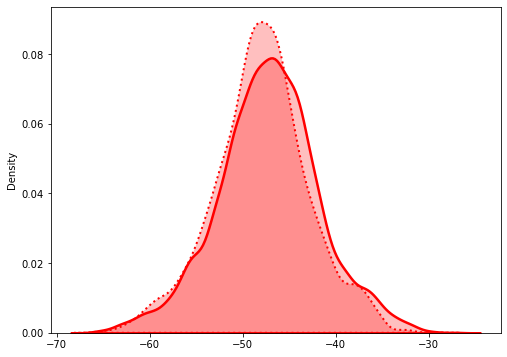

In [8]:
index = 'HadCM3'


fig, ax1 = plt.subplots(figsize=(10,6))
fig.subplots_adjust(right=0.75)
ax = sns.kdeplot(list(dic[index].lat),lw=2.5,color='r', shade=True, vertical=False, label='Model Latitude',ax=ax1)
ax = sns.kdeplot(list(dic['NOAA'].lat),lw=2,color='r',shade=True,linestyle = ':', vertical=False,label='Reananalysis Latitude', ax = ax1)
l1 = ax.lines[0]
l2 = ax.lines[1]
x1, y1 = l1.get_xydata().T
x2, y2 = l2.get_xydata().T
xmin = max(x1.min(), x2.min())
xmax = min(x1.max(), x2.max())
x = np.linspace(xmin, xmax, 100)
y1 = np.interp(x, x1, y1)
y2 = np.interp(x, x2, y2)
y = np.minimum(y1, y2)
ax.fill_between(x, y, color="white", alpha=1)
tkw = dict(size=4, width=1.5)
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend()
plt.title(str(index)+' Jet Latitude Area difference', fontsize=16, ha='center')
plt.show()

Table 1 - Results Table

In [9]:
monthly={}
annual={}
winter={}
seasonal={}
for index in dic:
    annual[index] = pd.DataFrame(pd.to_numeric(dic[index].set_index('years').lat).groupby(level='years').mean())
    annual[index]['ua'] = pd.to_numeric(dic[index].set_index('years').ua).groupby(level='years').mean()
    annual[index]['width'] = pd.to_numeric(dic[index].set_index('years').width).groupby(level='years').mean()
    annual[index]['pr'] = pd.to_numeric(dic[index].set_index('years').pr).groupby(level='years').mean()
    annual[index]['top'] = pd.to_numeric(dic[index].set_index('years').top).groupby(level='years').mean()
    annual[index]['bottom'] = pd.to_numeric(dic[index].set_index('years').bottom).groupby(level='years').mean()
    monthly[index] = pd.DataFrame(pd.to_numeric(dic[index].set_index(['years','months']).lat).groupby(['years','months']).mean())
    monthly[index]['ua'] = pd.to_numeric(dic[index].set_index(['years','months']).ua).groupby(['years','months']).mean()
    monthly[index]['width'] = pd.to_numeric(dic[index].set_index(['years','months']).width).groupby(['years','months']).mean()
    monthly[index]['pr'] = pd.to_numeric(dic[index].set_index(['years','months']).pr).groupby(['years','months']).mean()
    monthly[index]['top'] = pd.to_numeric(dic[index].set_index(['years','months']).top).groupby(['years','months']).mean()
    monthly[index]['bottom'] = pd.to_numeric(dic[index].set_index(['years','months']).bottom).groupby(['years','months']).mean()
    winter[index] = pd.DataFrame(pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').lat).groupby(level='years').mean())
    winter[index]['ua'] = pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').ua).groupby(level='years').mean()
    winter[index]['width'] = pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').width).groupby(level='years').mean()
    winter[index]['pr'] = pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').pr).groupby(level='years').mean()
    winter[index]['top'] = pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').top).groupby(level='years').mean()
    winter[index]['bottom'] = pd.to_numeric(dic[index].where(is_winter(dic[index].months)).dropna().set_index('years').bottom).groupby(level='years').mean()
    seasonal[index] = pd.DataFrame(pd.to_numeric(dic[index].set_index(['years','seasons']).lat).groupby(level=['years','seasons']).mean())
    seasonal[index]['ua'] = pd.to_numeric(dic[index].set_index(['years','seasons']).ua).groupby(level=['years','seasons']).mean()
    seasonal[index]['width'] = pd.to_numeric(dic[index].set_index(['years','seasons']).width).groupby(level=['years','seasons']).mean()
    seasonal[index]['pr'] = pd.to_numeric(dic[index].set_index(['years','seasons']).pr).groupby(level=['years','seasons']).mean()
    seasonal[index]['top'] = pd.to_numeric(dic[index].set_index(['years','seasons']).top).groupby(level=['years','seasons']).mean()
    seasonal[index]['bottom'] = pd.to_numeric(dic[index].set_index(['years','seasons']).bottom).groupby(level=['years','seasons']).mean()

In [10]:
# mean var winter anoma Summ anom pr correlation
df = pd.DataFrame([],columns=["model" ,"latitude" ,"Velocity", "Width","Northern Extent","Southern Extent", "Lat std", "ua std", "width std" ,"Northern Extent std","Southern Extent std" ,"lat anom" , "ua anom" , "width anom","Northern Extent anom","Southern Extent anom","lat pr corr" ,"lat p-value", "ua pr corr" , "ua p-value", "width pr corr", "width p-value","Northern Extent corr","Northern Extent p-value","Southern Extent corr","Southern Extent p-values"])

In [11]:
for index in dic:
    df.loc[len(df)] = [
    index,
    round(np.mean(dic[index].lat),2),
    round(np.mean(dic[index].ua),2),
    round(np.mean(dic[index].width),2),
    round(np.mean(dic[index].top),2),
    round(np.mean(dic[index].bottom),2),
    round(np.std(dic[index].lat),2),
    round(np.std(dic[index].ua),2),
    round(np.std(dic[index].width),2),
    round(np.std(dic[index].top),2),
    round(np.std(dic[index].bottom),2),
    round(np.mean(np.mean(dic[index].lat) - winter[index].lat),2),
    round(np.mean(np.mean(dic[index].ua) - winter[index].ua),2),
    round(np.mean(np.mean(dic[index].width) - winter[index].width),2),
    round(np.mean(np.mean(dic[index].top) - winter[index].top),2),
    round(np.mean(np.mean(dic[index].bottom) - winter[index].bottom),2),
    round(scipy.stats.pearsonr(list(seasonal[index].lat),list(seasonal[index].pr))[0],2),
    format(scipy.stats.pearsonr(list(seasonal[index].lat),list(seasonal[index].pr))[1],'.2e'),
    round(scipy.stats.pearsonr(list(seasonal[index].ua),list(seasonal[index].pr))[0],2),
    format(scipy.stats.pearsonr(list(seasonal[index].ua),list(seasonal[index].pr))[1],'.2e'),
    round(scipy.stats.pearsonr(list(seasonal[index].width),list(seasonal[index].pr))[0],2),
    format(scipy.stats.pearsonr(list(seasonal[index].width),list(seasonal[index].pr))[1],'.2e'),
    format(scipy.stats.pearsonr(list(seasonal[index].top),list(seasonal[index].pr))[0],'.2e'),
    format(scipy.stats.pearsonr(list(seasonal[index].top),list(seasonal[index].pr))[1],'.2e'),
    format(scipy.stats.pearsonr(list(seasonal[index].bottom),list(seasonal[index].pr))[0],'.2e'),
    format(scipy.stats.pearsonr(list(seasonal[index].bottom),list(seasonal[index].pr))[1],'.2e'),
    ]

In [12]:
df_float = df.iloc[:,:1].join(df.iloc[:,1:].astype('float'))
for colname in df.columns:      #only p-values in scientific rest in decimal/float
    if "p-value" in colname:
        df_float[colname] = df[colname]
        
df = df_float

In [13]:
df.head()

,model,latitude,Velocity,Width,Northern Extent,Southern Extent,Lat std,ua std,width std,Northern Extent std,...,lat pr corr,lat p-value,ua pr corr,ua p-value,width pr corr,width p-value,Northern Extent corr,Northern Extent p-value,Southern Extent corr,Southern Extent p-values
0,IPSL-CM5A-LR,-44.24,17.39,22.42,-33.17,-55.59,5.11,2.93,5.61,3.87,...,0.04,5.79e-01,0.31,3.17e-06,0.46,1.00e-12,0.398,1.31e-09,-0.193,4.51e-03
1,MPI-ESM-MR,-46.59,17.17,23.68,-34.62,-58.30,6.04,3.02,6.63,4.88,...,0.25,1.73e-04,-0.13,6.22e-02,0.60,2.80e-22,0.609,2.68e-23,-0.211,1.78e-03
2,MRI-ESM1,-49.83,18.20,24.79,-36.40,-61.19,6.99,3.49,7.57,5.81,...,-0.28,2.76e-05,0.25,1.89e-04,0.61,4.84e-23,0.287,1.86e-05,-0.459,1.16e-12
3,MIROC-ESM-CHEM,-45.86,18.16,23.64,-34.08,-57.72,5.62,3.07,6.92,4.43,...,-0.15,2.28e-02,0.34,4.40e-07,0.59,1.13e-21,0.415,2.10e-10,-0.457,1.44e-12
4,EC-EARTH,-47.61,16.88,23.98,-35.40,-59.38,6.23,3.10,6.72,5.14,...,0.14,4.63e-02,0.31,4.45e-06,0.68,1.40e-30,0.587,2.14e-21,-0.301,6.85e-06


In [14]:
df.to_csv('../JET_OUT/results_table.csv',float_format='%.3f')